In [5]:
!pip install sympy
from sympy import symbols, Eq, solve, solveset, S, Intersection, sign
import numpy as np


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.2 MB 1.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.0/6.2 MB 1.9 MB/s eta 0:00:03
   ---------- ----------------------------- 1.6/6.2 MB 2.0 MB/s eta 0:00:03
   ----------- ---------------------------- 1.8/6.2 MB 2.0 MB/s eta 0:00:03
   --------------- ------------------------ 2.4/6.2 MB 2.1 MB/s eta 0:00:02
   ---------------- ----------------------- 2.6/6.2 MB 2.0 MB/s eta 0:00:02
   -------------------- ------------------- 3.1/6.2 MB 1.9 MB/s eta 0:00:02
   ---------------------- ----------------- 3.4/6.2 MB 1.9 MB/s eta 0:00:02
   ----------------------- ---------------- 3.7/6.2 MB 1.8 MB/s eta 0:00:02
   ------------------------- -------------- 3.9/6.2 MB 1.8 MB/s eta 0:00:02
   --------------------------- ---------

In [6]:
x= symbols('x')
eq = 1*x**4 + 2*x**3 + 3*x**2 +4*x + 5
eq = x**4 - 5*x**2 + 4
# eq = (x - 2)**2 * (x + 3)**2
# eq = x**4 + x**3 - 11*x**2 + 9*x + 4


In [7]:
sol = solveset(eq, x, domain=S.Reals)

In [8]:
if isinstance(sol, Intersection):
    sol =  []

In [9]:
len(sol)

4

In [10]:
sol

{-2, -1, 1, 2}

In [11]:
sol = sorted([float(_.evalf()) for _ in sol])

In [12]:
sol[0]

-2.0

In [13]:
sol[1]

-1.0

In [14]:
#a*x**4 + b*x**3 + c*x**2 + d*x +e <= 0

def xetdau(Equation, solution, Type = -1):
    """
    Type = -1: f(x) <= 0
    Type = 1 : f(x) >= 0
    """
    intervals = []
    x = symbols('x')
    
    if len(solution) == 0: # no real esolution = 0 raise error
        raise ValueError("Invalid input!")
        
    pre_isvalid = False
    if Type * float(Equation.subs(x, solution[0]-1).evalf()) > 0:
        intervals.append((-np.inf, solution[0]))
        pre_isvalid = True
        
    for i in range(len(solution)-1):
        if Type * float(Equation.subs(x, (solution[i] + solution[i+1]) / 2).evalf()) > 0: #middle point
            if pre_isvalid == True:
                temp = intervals[-1][0]
                intervals.pop()
                intervals.append((temp, solution[i+1]))
            else:
                intervals.append((solution[i], solution[i+1]))
                pre_isvalid = True
        else:
            if pre_isvalid == False:
                intervals.append((solution[i], solution[i]))
            pre_isvalid = False

    # last element
    i = len(solution) -1 
    if Type * float(Equation.subs(x, solution[i] +1 ).evalf()) > 0: 
        if pre_isvalid == True:
            temp = intervals[-1][0]
            intervals.pop()
            intervals.append((temp, np.inf))
        else:
            intervals.append((solution[i], np.inf))
            pre_isvalid = True
    else:
        if pre_isvalid == False:
            intervals.append((solution[i], solution[i]))
        pre_isvalid = False
    return intervals  


In [15]:
sol

[-2.0, -1.0, 1.0, 2.0]

In [16]:
xetdau(eq,sol)

[(-2.0, -1.0), (1.0, 2.0)]

In [17]:
from intersection import Intersec, Union


In [18]:
def solve_inequality(a=0,b=0,c=0,d=0,e=0, Type = -1):
    """ 
    f(x) = a*x**4 + b*x**3 + c*x**2 + d*x + e
    Type = -1 : f(x) <= 0 
    Type = 1  : f(x) >= 0
    """
    if Type != 1 and Type != -1:
        raise ValueError('Type in {-1, 1}')
    x= symbols('x')
    
    eq = a*x**4 + b*x**3 + c*x**2 + d*x + e
    sol = solveset(eq, x, S.Reals)
    # print(sol)
    if isinstance(sol, Intersection):
        return []
    # print(sol)
    if len(sol) == 0:
        if Type*e > 0:
            return [(-np.inf, np.inf)]
        return []
    sol = sorted([float(_.evalf()) for _ in sol])
    return xetdau(eq, sol, Type)

In [19]:
solve_inequality(1,2,3,4,5)

[]

In [20]:
solve_inequality(2, -3, 5, -7, 1, Type = 1)

[(-inf, 0.15946831329397185), (1.3576426776022315, inf)]

In [21]:
solve_inequality(-1,0,-2,0,-1)


[(-inf, inf)]

In [29]:
def signinterval_fraction(numer, denom):
    """
    (ax^4 + bx^3 + cx^2 + dx + e) / (a'x^4 + b'x^3 + c'x^2 + d'x + e') >= 0
    
    Input:
        numer = [a,b,c,d,e]
        denom = [a',b',c',d',e']
    Output:
        [(__, __), (__, __), (__, __), ...]
    """
    a, b, c, d, e = numer
    a_, b_, c_, d_, e_ = denom

    numerinterval_plus = solve_inequality(a, b, c, d, e, Type = 1)
    denominterval_plus = solve_inequality(a_, b_, c_, d_, e_, Type = 1)
    
    numerinterval_minus = solve_inequality(a, b, c, d, e, Type = -1)
    denominterval_minus = solve_inequality(a_, b_, c_, d_, e_, Type = -1)
    print("plus", numerinterval_plus, denominterval_plus)
    print("minus", numerinterval_minus, denominterval_minus)
    print(Intersec(numerinterval_plus, denominterval_plus))
    print(Intersec(numerinterval_minus, denominterval_minus))
    return Union(Intersec(numerinterval_plus, denominterval_plus),
                 Intersec(numerinterval_minus, denominterval_minus))


In [30]:
# test case 1
# (x^4 - 5x^2 + 4) / (x^4 + 1) >= 0

n, d = [[1, 0, -5, 0, 4], [1, 0, 0, 0, 1]]
signinterval_fraction(n, d)

plus [(-inf, -2.0), (-1.0, 1.0), (2.0, inf)] [(-inf, inf)]
minus [(-2.0, -1.0), (1.0, 2.0)] []
[(-inf, -2.0), (-1.0, 1.0), (2.0, inf)]
[]


[(-inf, -2.0), (-1.0, 1.0), (2.0, inf)]

**Plot**

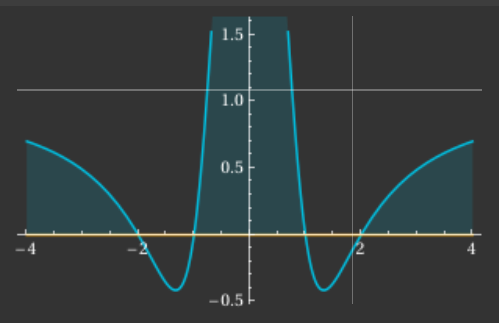

In [31]:
# test case 2
# (x^4 - 3x^3 + 2x^2) / (x^4 - 4x^3 + 4x^2) >= 0

n, d = [[1, -3, 2, 0, 0], [1, -4, 4, 0, 0]]
signinterval_fraction(n, d)

plus [(-inf, 1.0), (2.0, inf)] [(-inf, inf)]
minus [(0.0, 0.0), (1.0, 2.0)] [(0.0, 0.0), (2.0, 2.0)]
[(-inf, 1.0), (2.0, inf)]
[(0.0, 0.0), (1.0, 2.0), (2.0, 2.0)]


[(-inf, 0.0), (0.0, 2.0), (2.0, 2.0), (2.0, inf)]

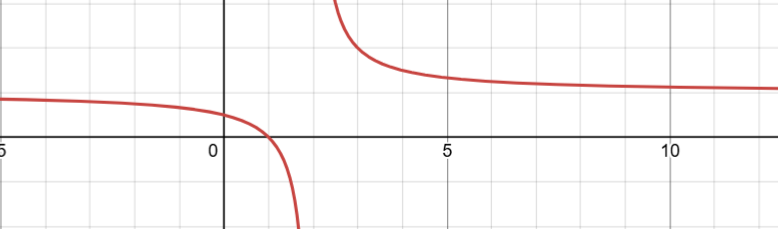

In [25]:
# test case 3
# (x^4 - 2x^3 + x^2) / (x^4 - x^3 - x^2 + x) >= 0

n, d = [[1, -2, 1, 0, 0], [1, -1, -1, 1, 0]]
signinterval_fraction(n, d)

[(-inf, -1.0), (0.0, 1.0), (1.0, inf)]

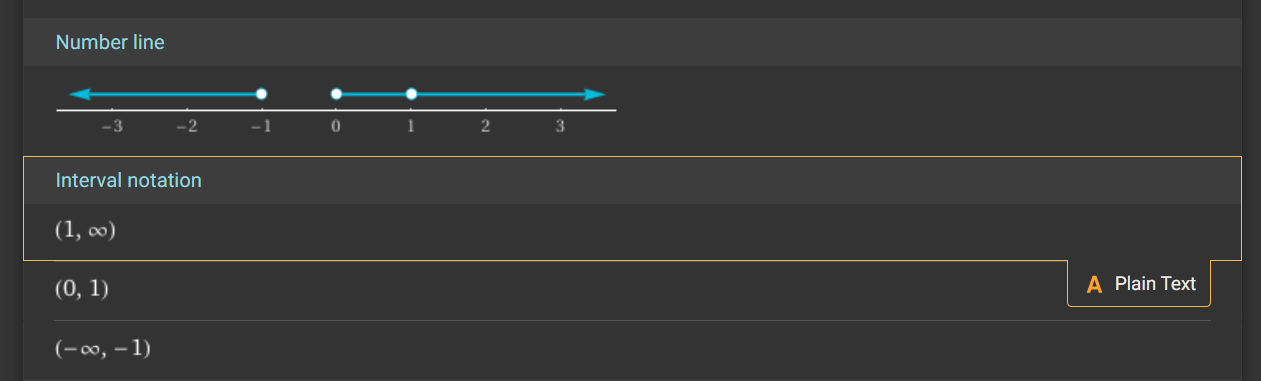

## Other testcases

Test Case 4: Numerator and denominator have no real roots.
Inequality:
(x^4 + 2x^2 + 1) / (x^4 + 3x^2 + 2) >= 0

Coefficients:
[[1, 0, 2, 0, 1], [1, 0, 3, 0, 2]]

Test Case 5: Numerator and denominator have all coefficients zero except the leading term.
Inequality:
(x^4) / (x^4) >= 0

Coefficients:
[[1, 0, 0, 0, 0], [1, 0, 0, 0, 0]]

Test Case 6: Numerator has a higher degree than the denominator (degenerate case).
Inequality:
(x^4 + x^3 + x^2 + x + 1) / (x^2 + 1) >= 0

Coefficients:
[[1, 1, 1, 1, 1], [0, 0, 1, 0, 1]]

Test Case 7: Numerator and denominator have opposite leading coefficients.
Inequality:
(-x^4 + 3x^2 - 2) / (x^4 - 4x^2 + 4) >= 0

Coefficients:
[[-1, 0, 3, 0, -2], [1, 0, -4, 0, 4]]

Test Case 8: Numerator and denominator have all coefficients zero (undefined case).
Inequality:
(0) / (0) >= 0

Coefficients:
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

Test Case 9: Numerator and denominator have complex roots.
Inequality:
(x^4 + 4x^2 + 4) / (x^4 + 6x^2 + 9) >= 0

Coefficients:
[[1, 0, 4, 0, 4], [1, 0, 6, 0, 9]]

Test Case 10: Numerator and denominator have mixed signs.
Inequality:
(x^4 - 2x^3 + 3x^2 - 4x + 5) / (x^4 + 2x^3 - 3x^2 + 4x - 5) >= 0

Coefficients:
[[1, -2, 3, -4, 5], [1, 2, -3, 4, -5]]

